<a href="https://colab.research.google.com/github/jiachun23/StudentDropout_ChurnPrediction/blob/main/ChurnPrediction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing packages
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
import pandas as pd # data processing
import numpy as np # working with arrays
from numpy import where
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Importing and cleaning the data
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS.csv', sep=';')
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [4]:
test_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,794,68.10,A,19.40,100.23,A,37,235.34,A,1,2020,2020/2021
1,844,57.85,C,12.57,96.14,A,32,215.75,B,1,2020,2020/2021
2,658,64.60,B,17.57,101.59,A,37,224.27,B,1,2020,2020/2021
3,1193,56.93,C,13.28,102.31,A,36,216.56,B,1,2020,2020/2021
4,1400,61.35,C,15.40,93.72,B,34,214.72,B,1,2020,2020/2021


In [6]:
print(train_data.shape)
print(test_data.shape)
print(list(train_data.columns))

(261, 12)
(60, 12)
['access', 'tests', 'tests_grade', 'exam', 'project', 'project_grade', 'assignments', 'result_points', 'result_grade', 'graduate', 'year', 'acad_year']


In [7]:
train_data['graduate'].value_counts()

1    210
0     51
Name: graduate, dtype: int64

In [9]:
test_data['graduate'].value_counts()

1    46
0    14
Name: graduate, dtype: int64

In [10]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

print(cl('X_var samples : ', attrs = ['bold']), X_train[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_train[:5])

X_var samples :  [[1256.     57.     40.  ]
 [ 985.     42.87   13.7 ]
 [1455.     54.5    40.  ]
 [ 998.     54.5    40.  ]
 [1347.     55.     39.  ]]
y_var samples :  [1 1 1 1 1]


In [11]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

print(cl('X_var samples : ', attrs = ['bold']), X_test[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_test[:5])

X_var samples :  [[ 794.     68.1    37.  ]
 [ 844.     57.85   32.  ]
 [ 658.     64.6    37.  ]
 [1193.     56.93   36.  ]
 [1400.     61.35   34.  ]]
y_var samples :  [1 1 1 1 1]


In [13]:
# Data normalization with sklearn
from sklearn import preprocessing
standardized_X = preprocessing.scale(X_test)
df = pd.DataFrame(standardized_X)
df.describe()

,0,1,2
count,6.000000e+01,6.000000e+01,6.000000e+01
mean,-6.291264e-17,4.070818e-16,7.031412e-17
std,1.008439e+00,1.008439e+00,1.008439e+00
min,-2.201088e+00,-2.870371e+00,-2.841506e+00
25%,-5.506751e-01,-6.288193e-01,-8.207221e-01
50%,-1.676396e-01,3.510590e-01,2.428486e-01
75%,5.836475e-01,7.641450e-01,8.809911e-01
max,2.820037e+00,1.491048e+00,1.306419e+00


Counter({1: 210, 0: 51})


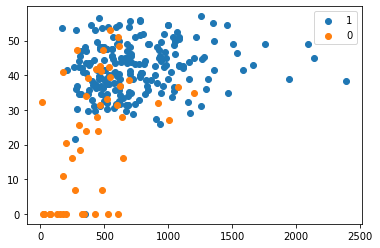

In [14]:
# Summarize class distribution
counter = Counter(y_train)
print(counter)

for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [15]:
# Transform the dataset
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# Summarize the new class distribution
counter = Counter(y_train_res)
print(counter)

Counter({1: 210, 0: 210})


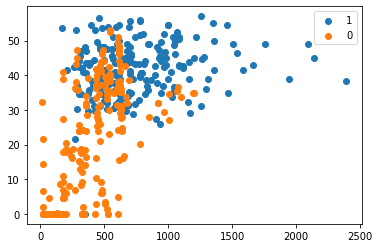

In [18]:
for label, _ in counter.items():
	row_ix = where(y_train_res == label)[0]
	plt.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [19]:
# Modelling
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
print(cl(lr1, attrs = ['bold']))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [20]:
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(lr1, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.979


In [21]:
# Predictions
yhat = lr1.predict(X_test)
yhat_prob = lr1.predict_proba(X_test)

In [26]:
# Evaluate with Mean Absolute Error and print Model Accuracy
from sklearn.metrics import mean_absolute_error
def evaluate(lr1, x_scaled, y_test):
    predictions = lr1.predict(x_scaled)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))

base_accuracy = evaluate(lr1, X_test, y_test)

Model Performance
Average Error: 0.0667
Accuracy = 93.33%


In [27]:
# Classificaton report
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        46

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



Recall metric in the testing dataset: 95.65217391304348%


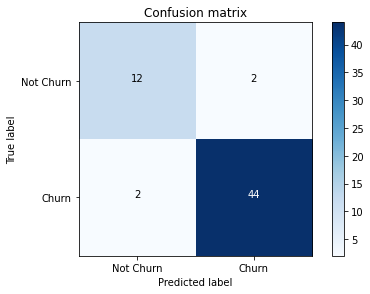

In [33]:
# Confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       
    else:
        1



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = ["Not Churn", "Churn"]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

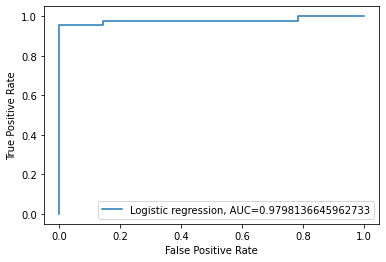

In [30]:
# Import the metrics class
from sklearn import metrics
y_pred_proba = lr1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show()